In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [9]:
df=pd.read_csv('F:\VS code\project\project-xyz - Sheet1 (2).csv')
df.head()

,Residence Score,Bathroom_score,Attached_Kitchen,Avl_ShoppingMall,Avl_beds,Rate_Transport,Medical_Shops,Mess_Avl,Market_time,College_time,Avl_playground,Total_rent
0,3,4,1,0,4,4,0,3,5,10,1,6000
1,2,1,0,1,1,4,1,4,5,10,0,2000
2,2,3,0,1,1,5,1,4,5,5,1,2500
3,1,1,0,1,2,2,1,3,10,15,1,3000
4,3,4,1,1,4,4,1,4,10,5,1,6000


In [10]:
df.dtypes

Residence Score      int64
Bathroom_score       int64
Attached_Kitchen     int64
Avl_ShoppingMall     int64
Avl_beds             int64
Rate_Transport       int64
Medical_Shops        int64
Mess_Avl             int64
Market_time          int64
College_time         int64
Avl_playground       int64
Total_rent          object
dtype: object

### as we can see here that Total_rent is object data type we have to convert it neumeric data type to fit the model

In [11]:
df['Total_rent'].replace(',','',regex=True,inplace=True)

In [12]:
df.loc[[1,2,4]]

,Residence Score,Bathroom_score,Attached_Kitchen,Avl_ShoppingMall,Avl_beds,Rate_Transport,Medical_Shops,Mess_Avl,Market_time,College_time,Avl_playground,Total_rent
1,2,1,0,1,1,4,1,4,5,10,0,2000
2,2,3,0,1,1,5,1,4,5,5,1,2500
4,3,4,1,1,4,4,1,4,10,5,1,6000


In [13]:
df.dtypes

Residence Score      int64
Bathroom_score       int64
Attached_Kitchen     int64
Avl_ShoppingMall     int64
Avl_beds             int64
Rate_Transport       int64
Medical_Shops        int64
Mess_Avl             int64
Market_time          int64
College_time         int64
Avl_playground       int64
Total_rent          object
dtype: object

### Now we can see that Total_rent data type has not changed yet so we are going to convert it neumeric

In [14]:
df['Total_rent']=pd.to_numeric(df['Total_rent'])

In [15]:
df.dtypes

Residence Score     int64
Bathroom_score      int64
Attached_Kitchen    int64
Avl_ShoppingMall    int64
Avl_beds            int64
Rate_Transport      int64
Medical_Shops       int64
Mess_Avl            int64
Market_time         int64
College_time        int64
Avl_playground      int64
Total_rent          int64
dtype: object

As all the datas are neumeric format we are good to go with our model

 ####                                                    Data Viz

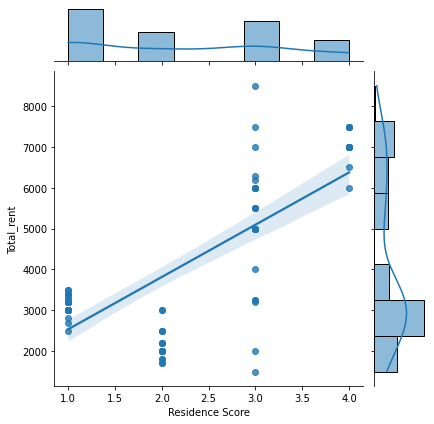

In [16]:
sn.jointplot(x='Residence Score',y='Total_rent',data=df,kind='reg')

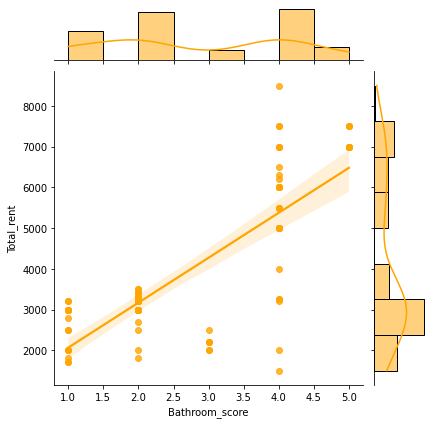

In [17]:
sn.jointplot(x='Bathroom_score',y='Total_rent',data=df,kind='reg',color='orange')

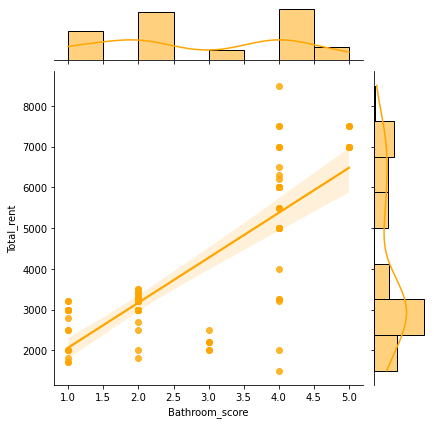

In [18]:
sn.jointplot(x='Bathroom_score',y='Total_rent',data=df,kind='reg',color='orange')

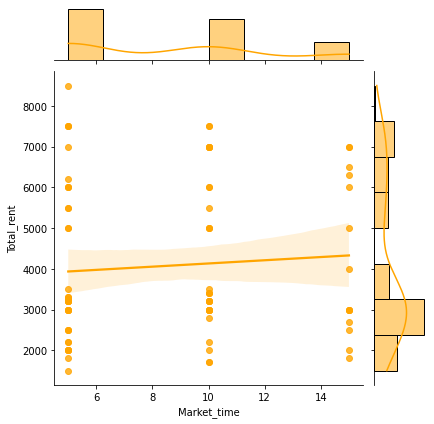

In [19]:
sn.jointplot(x='Market_time',y='Total_rent',data=df,kind='reg',color='orange')

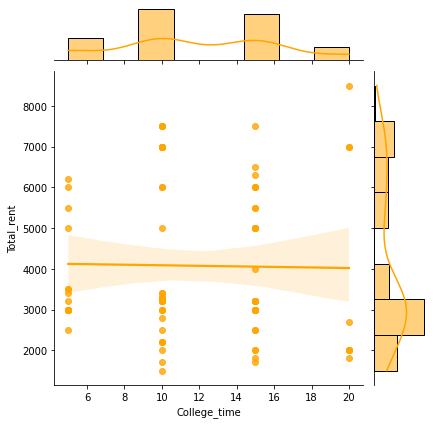

In [20]:
sn.jointplot(x='College_time',y='Total_rent',data=df,kind='reg',color='orange')


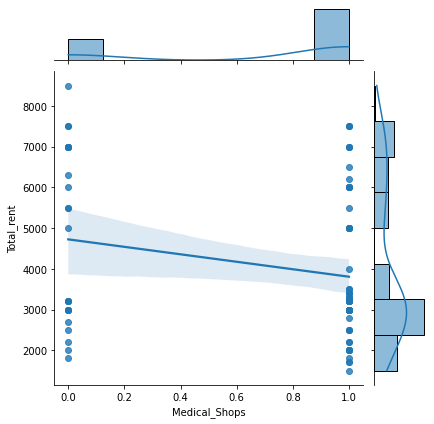

In [21]:
sn.jointplot(x='Medical_Shops',y='Total_rent',data=df,kind='reg')

In [22]:
df.corr()

,Residence Score,Bathroom_score,Attached_Kitchen,Avl_ShoppingMall,Avl_beds,Rate_Transport,Medical_Shops,Mess_Avl,Market_time,College_time,Avl_playground,Total_rent
Residence Score,1.000000,0.873785,0.261145,-0.014689,0.809383,-0.143336,-0.152374,-0.246081,0.017539,0.083148,0.344883,0.751492
Bathroom_score,0.873785,1.000000,0.396308,0.020434,0.830659,-0.042793,-0.181056,-0.231137,-0.065482,0.020416,0.305170,0.782882
Attached_Kitchen,0.261145,0.396308,1.000000,-0.069410,0.280982,0.106454,0.170001,0.165091,-0.352504,0.189642,0.098176,0.318835
Avl_ShoppingMall,-0.014689,0.020434,-0.069410,1.000000,0.084412,0.136555,-0.060737,-0.099793,0.040064,-0.211170,0.066562,0.053153
Avl_beds,0.809383,0.830659,0.280982,0.084412,1.000000,-0.084038,-0.196082,-0.243645,0.076357,0.007240,0.167080,0.845583
Rate_Transport,-0.143336,-0.042793,0.106454,0.136555,-0.084038,1.000000,0.250952,0.178156,-0.563971,-0.740107,-0.050229,-0.095919
Medical_Shops,-0.152374,-0.181056,0.170001,-0.060737,-0.196082,0.250952,1.000000,0.500336,-0.220975,-0.058010,-0.182424,-0.224010
Mess_Avl,-0.246081,-0.231137,0.165091,-0.099793,-0.243645,0.178156,0.500336,1.000000,-0.121860,-0.007020,-0.103869,-0.283060
Market_time,0.017539,-0.065482,-0.352504,0.040064,0.076357,-0.563971,-0.220975,-0.121860,1.000000,-0.001166,-0.076604,0.078006
College_time,0.083148,0.020416,0.189642,-0.211170,0.007240,-0.740107,-0.058010,-0.007020,-0.001166,1.000000,0.060779,-0.015916


In [23]:
x_val=df.drop('Total_rent',axis=1)
y_val=df['Total_rent']

In [24]:
x_val.columns

Index(['Residence Score', 'Bathroom_score', 'Attached_Kitchen',
       'Avl_ShoppingMall', 'Avl_beds', 'Rate_Transport', 'Medical_Shops',
       'Mess_Avl', 'Market_time', 'College_time', 'Avl_playground'],
      dtype='object')

In [25]:
for i in range(len(x_val.columns)):
    print(f'{x_val.columns[i]}------->{x_val[x_val.columns[i]].unique()}')

Residence Score------->[3 2 1 4]
Bathroom_score------->[4 1 3 2 5]
Attached_Kitchen------->[1 0]
Avl_ShoppingMall------->[0 1]
Avl_beds------->[4 1 2 3 5 6]
Rate_Transport------->[4 5 2 3 1 0]
Medical_Shops------->[0 1]
Mess_Avl------->[3 4 2 7 1]
Market_time------->[ 5 10 15]
College_time------->[10  5 15 20]
Avl_playground------->[1 0]


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_val,y_val,random_state=1,train_size=.9)

In [27]:
len(x_train)

80

In [28]:
len(y_train)

80

In [29]:
len(y_test)

9

### model no 1 simple linear regression

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
x_test.head(n=3)

,Residence Score,Bathroom_score,Attached_Kitchen,Avl_ShoppingMall,Avl_beds,Rate_Transport,Medical_Shops,Mess_Avl,Market_time,College_time,Avl_playground
60,1,2,0,1,2,1,1,3,10,15,1
70,1,2,1,1,2,4,1,3,5,10,0
53,1,1,0,1,2,4,1,4,10,5,0


In [32]:
y_test.head(n=3)

60    3000
70    3300
53    3000
Name: Total_rent, dtype: int64

In [33]:
print(model.coef_)
print(model.intercept_)

[ 177.18268075  181.69201097  581.85793818  -92.58109053  666.74663765
 -197.91401044  -54.17453274 -272.25568736   -5.888217    -77.28135561
 -174.1236801 ]
3523.091208688835


In [34]:
pred=model.predict(x_test)

In [35]:
r2_score(pred,y_test)

-0.007888234872864164

In [36]:
np.sqrt(mean_squared_error(pred,y_test))

1292.5894038937047

In [37]:
model.predict([[1,2,0,1,2,1,1,3,10,15,1]])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2843.48830661])

In [38]:
model.predict([[1,2,1,1,2,4,1,3,5,10,0]])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3421.57575663])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_rent', ylabel='Density'>

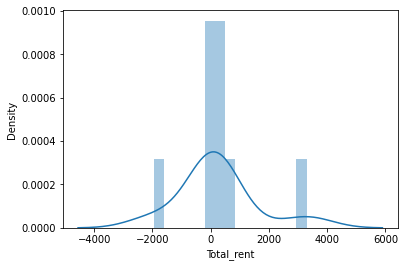

In [39]:
sn.distplot(y_test-pred)

### model no 2 adaboost regressor

In [40]:
model2=AdaBoostRegressor(n_estimators=45,learning_rate=.1)
model2.fit(x_train,y_train)



AdaBoostRegressor(learning_rate=0.1, n_estimators=45)

In [41]:
model2.predict([[1,2,1,1,2,4,1,3,5,10,0]])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([3100.])

In [42]:
cross_val_score(AdaBoostRegressor(n_estimators=45,learning_rate=.1),x_train,y_train,cv=3).mean()

0.7542462870625136

### model no 3 gradient boost regressor

In [43]:
model3=GradientBoostingRegressor(n_estimators=45,learning_rate=.1)
model3.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=45)

In [44]:
model3.predict([[1,2,1,1,2,4,1,3,5,10,0]])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([3013.46579145])

In [45]:
cross_val_score(GradientBoostingRegressor(n_estimators=45,learning_rate=.1),x_train,y_train,cv=3).mean()

0.7404158585964596

#### model no 4 Random Forest Regressor

In [46]:
model4=RandomForestRegressor(n_estimators=63)
model4.fit(x_train,y_train)

RandomForestRegressor(n_estimators=63)

In [47]:
model4.predict([[1,2,1,1,2,4,1,3,5,10,0]])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3055.55555556])

In [48]:
cross_val_score(RandomForestRegressor(n_estimators=63),x_train,y_train,cv=3).mean()

0.7983456285838892

### Model no 5 xgboost regressor

In [49]:
model5=XGBRegressor(
                max_depth=7,
               learning_rate=.1,
               min_child_weight =5,
                booster='gblinear',
              n_estimators=50)
model5.fit(x_train,y_train,early_stopping_rounds=10,eval_set=[(x_test,y_test)])


[00:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1901.10632
[1]	validation_0-rmse:1242.79508
[2]	validation_0-rmse:1115.25057
[3]	validation_0-rmse:1080.19912
[4]	validation_0-rmse:1064.42230
[5]	validation_0-rmse:1055.57698
[6]	validation_0-rmse:1048.10714
[7]	validation_0-rmse:1043.31796
[8]	validation_0-rmse:1040.33519
[9]	validation_0-rmse:1039.62904
[10]	validation_0-rmse:1041.06915
[11]	validation_0-rmse:1041.50544
[12]	validation_0-rmse:1044.91062
[13]	validation_0-rmse:1047.71159
[14]	validation_0-rmse:1050.25426
[15]	validation_0-rmse:1051.91619
[16]	validation_0-rmse:1055.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [50]:
print(model5.intercept_)
print(model5.coef_)

[575.054]
[ 3.79559e+02  2.65160e+02  4.50432e+02  3.47978e+02  3.07967e+02
  8.03048e+00 -8.66553e+01  3.74715e-01  4.05508e+01  9.83834e+00
  1.28828e+02]


In [51]:
[1,2,0,1,2,1,1,3,10,15,1]

[1, 2, 0, 1, 2, 1, 1, 3, 10, 15, 1]

In [52]:
y_pred=model5.predict(x_test)

In [53]:
r2_score(y_pred,y_test)

0.3290620791436376

In [54]:
np.sqrt(mean_squared_error(y_pred,y_test))

1059.8511380529824

Residence Score------->[3 2 1 4]
Bathroom_score------->[4 1 3 2 5]
Attached_Kitchen------->[1 0]
Avl_ShoppingMall------->[0 1]
Avl_beds------->[4 1 2 3 5 6]
Rate_Transport------->[4 5 2 3 1 0]
Medical_Shops------->[0 1]
Mess_Avl------->[3 4 2 7 1]
Market_time------->[ 5 10 15]
College_time------->[10  5 15 20]
Avl_playground------->[1 0]

In [55]:
import math

 a=float(input(" Residence Score:"))
    b=float(input("Bathroom_score:"))
    c=float(input("Attached_Kitchen':"))
    d=float(input("Avl_ShoppingMall:"))
    e=float(input("Avl_beds:"))
    f=float(input("Rate_Transport:"))
    g=float(input("Medical_Shops:"))
    h=float(input("Mess_Avl:"))
    i=float(input("Market_time:"))
    j=float(input("College_time:"))
    k=float(input("Avl_playground:"))

In [56]:
def predict_houseprice(a,b,c,d,e,f,g,h,i,j,k):
    a1=a*model5.coef_[0]
    b1=b*model5.coef_[1]
    c1=c*model5.coef_[2]
    d1=d*model5.coef_[3]
    e1=e*model5.coef_[4]
    f1=f*model5.coef_[5]
    g1=g*model5.coef_[6]
    h1=h*model5.coef_[7]
    i1=i*model5.coef_[8]
    j1=j*model5.coef_[9]
    k1=k*model5.coef_[10]
    print( f"The predicted price of the house rent is Rs. {math.floor(a1+b1+c1+d1+e1+f1+g1+h1+i1+j1+k1+model5.intercept_)}")
if __name__=="__main__":
    predict_houseprice(1,2,1,1,2,4,1,3,5,10,0)
    predict_houseprice(1,2,0,1,2,1,1,3,10,15,1)

The predicted price of the house rent is Rs. 3147
The predicted price of the house rent is Rs. 3053


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_rent', ylabel='Density'>

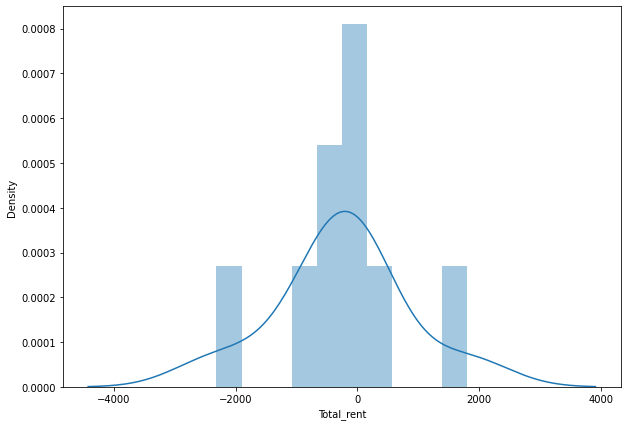

In [57]:
plt.figure(figsize=(10,7))
sn.distplot(y_pred-y_test)